# **Project Name**    -  **AirBnb Booking Analysis**


Project Type - EDA

Contribution - Individual

# **Problem Statement**


**Project Description**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.
Explore and analyse the data to discover key understandings.

**BUSINESS PROBLEM OVERVIEW**

As Airbnb continues to be a leading global travel platform with millions of listings and users, ensuring an exceptional customer experience and high engagement among hosts is crucial for the company's success. The business problem is to use data analysis to discover key understandings from the dataset containing approximately 49,000 observations and 16 columns of both categorical and numeric values. The goal is to identify insights that can guide strategic decision-making and improvements in various aspects of the platform.

#### **Business Objective**

**Enhancing Customer Experience and Increasing Host Engagement on Airbnb Platform**

# ***Let's Begin !***

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Loading

from google.colab import drive
drive.mount('/content/drive')
#Load the employee data into a pandas DataFrame
data=pd.read_csv('/content/drive/MyDrive/Dataset/Airbnb NYC 2019.csv')

Mounted at /content/drive


In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#droping id columns beacuse it doesn't used for my analysis.

data.drop(['id','host_id'],axis=1,inplace=True)

In [5]:
#reading column names

data.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [6]:
#info about the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [7]:
#checking null values

data.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data.shape

(48895, 14)

# **EDA**


In [9]:
#top 10 hotels those where booked high by customers.

hotel=data['name'].value_counts()

hotel.head(10)

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [10]:
#Location have High number of stay's

data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**Manhattan have high number of stays and Staten Island have low number of stays.**

In [11]:
#Area with top 5 high number of stays
area=data['neighbourhood'].value_counts()
area.head()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [12]:
#Which room type have high stays

data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

**As you can see home/apt have high number of stays.**

In [13]:
#average room pricing of each room type

data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

**You can the average room price of each room type and home/apt room type have the maximum average price among the other two.**

In [14]:
#Which room type have maximum nigh stays.

data.groupby('room_type')['minimum_nights'].sum()

room_type
Entire home/apt    216152
Private room       120067
Shared room          7511
Name: minimum_nights, dtype: int64

In [15]:
#number of area's each location contain

data.groupby('neighbourhood_group')['neighbourhood'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

In [16]:
#number of review each room type gets

data.groupby('room_type')['number_of_reviews'].sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [17]:
#average number of review each room type gets

data.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
Name: number_of_reviews, dtype: float64

In [18]:
#how much host does each room/type have

data.groupby('room_type')['host_name'].count()

room_type
Entire home/apt    25400
Private room       22314
Shared room         1160
Name: host_name, dtype: int64

In [19]:
#filling null values in the last_review column
data['last_review'].fillna(0)

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48895, dtype: object

In [20]:
#importing datetime to convert the last_review column in to seperate columns

from datetime import datetime

date=pd.to_datetime(data['last_review'])

In [21]:
#seperating columns into year,month,day and filling the null values into the columns

data['Year']=date.dt.year
data['month']=date.dt.month
data['day']=date.dt.day

data['Year'].fillna(0,inplace=True)
data['month'].fillna(0,inplace=True)
data['day'].fillna(0,inplace=True)

In [22]:
#converting the str columns into integer

data['Year']=data['Year'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)

In [23]:
#droping the last_review column after converting into seperate column

data.drop('last_review',axis=1,inplace=True)

In [24]:
#number of bookings in a year

data['Year'].value_counts()

2019    25209
0       10052
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: Year, dtype: int64

**So the no of booking per year was increasing consistently.**

In [25]:
#number of bookings in a month

data['month'].value_counts()

6     13589
0     10052
7      5937
5      4701
1      2773
4      2109
12     1770
8      1667
10     1546
9      1535
3      1288
11     1158
2       770
Name: month, dtype: int64

**So in the month of June most of the booking have been booked.**

**Now we can concentrate in the Review part**

In [26]:
#number of review in a year

data.groupby('Year')['number_of_reviews'].sum()

Year
0             0
2011         61
2012        178
2013        242
2014        932
2015       5762
2016      16182
2017      28534
2018      72359
2019    1013755
Name: number_of_reviews, dtype: int64

In [27]:
#number of review in a month

data.groupby('month')['number_of_reviews'].sum()

month
0          0
1      31045
2       9472
3      15032
4      30588
5      94871
6     628570
7     253512
8      12832
9      14243
10     15168
11     12248
12     20424
Name: number_of_reviews, dtype: int64

In [28]:
#Total count of reviews that not been stored.

zero_re=data[data['number_of_reviews']==0]
len(zero_re)

10052

In [29]:
#number of not reviewed room type

zero_re.groupby('room_type')['number_of_reviews'].count()

room_type
Entire home/apt    5077
Private room       4661
Shared room         314
Name: number_of_reviews, dtype: int64

In [30]:
#average price for the not reviewed rooms

zero_re['price'].mean()

192.9190210903303

**Average price of not reviewed room is 192**

In [31]:
#number of not reviewed rooms in each location

zero_re['neighbourhood_group'].value_counts()

Manhattan        5029
Brooklyn         3657
Queens           1092
Bronx             215
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [32]:
#Top 10 not reviewed rooms in each area
new=zero_re['neighbourhood'].value_counts()
new.head(10)

Williamsburg          757
Bedford-Stuyvesant    573
Midtown               559
Bushwick              521
Upper West Side       489
Harlem                452
Hell's Kitchen        426
Upper East Side       393
East Village          363
Crown Heights         299
Name: neighbourhood, dtype: int64

In [33]:
#Top 10 names are been incharged at that time in the non reviewed rooms

name=zero_re['host_name'].value_counts()
name.head(10)

Blueground      204
Sonder (NYC)    120
David            94
Kara             84
Michael          82
Sonder           67
Pranjal          64
Daniel           56
Ken              52
Kazuya           52
Name: host_name, dtype: int64

**End of review segment analysis**

In [34]:
#top 10 hotel names have booked

hotel=data['name'].value_counts()
hotel.head(10)

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [35]:
#total list count of room type

data.groupby('room_type')['calculated_host_listings_count'].sum()

room_type
Entire home/apt    271834
Private room        72062
Shared room          5409
Name: calculated_host_listings_count, dtype: int64

In [36]:
#total list count of location

data.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64

###<h1>VISUALIZATION</h2>



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

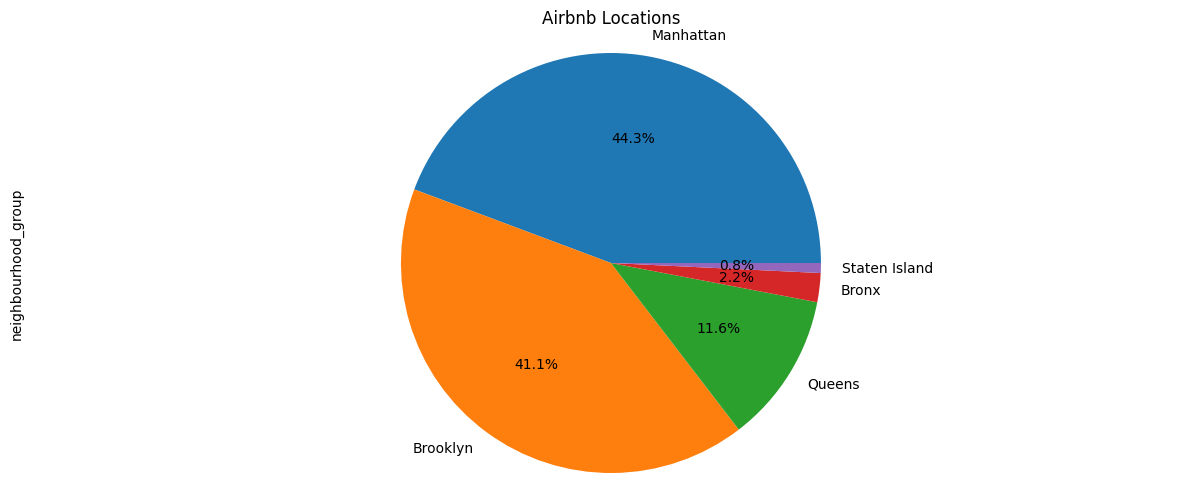

In [38]:
plt.figure(figsize=(8, 8))
data['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%")
plt.axis('equal')
plt.title('Airbnb Locations')
plt.show()

##### 1. Why did I pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 48895 Airbind Hotels and therefore the Manhattan Holds 44.3% and Brooklyn holds 41.1%, Queens holds 11.6%,Bronx Holds 2.2% and Staten Island Holds 0.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that Most of the Airbnb hotels are in the Manhattan and Brooklyn. But the Staten island,Queens and Bronx have very low Airbnb. So if the new Airbnb is opened it will do more business because in the Staten Island contain more tourist spot like green park spaces, museums and historical buildings.

#### **Chart - 2**

Text(0.5, 1.0, 'Total Number of location Distribution')

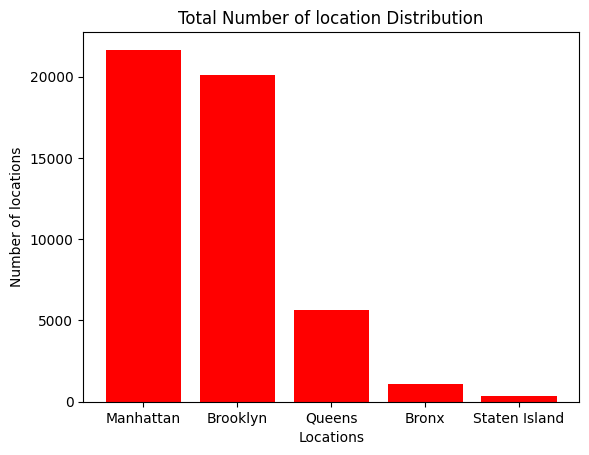

In [39]:
#total values distribution of location

neig=data['neighbourhood_group'].value_counts()

plt.bar(neig.index,neig.values,color='red')
plt.xlabel('Locations')
plt.ylabel('Number of locations')
plt.title('Total Number of location Distribution')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of airbnb with respect to locations, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the manhattan and brooklyn have 20,000+ Airbnb and other locations like Queens have 5000+ airbnb and Bronx and Staten have really low in number's around 1000 and 373 airbnb.

Which is really low compared to other three locations!!!.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that Most of the Airbnb hotels are in the Manhattan and Brooklyn. But the Staten island,Queens and Bronx have very low Airbnb. So if the new Airbnb is opened it will do more business because in the Staten Island contain more tourist spot like green park spaces, museums and historical buildings.

#### **Chart - 3**

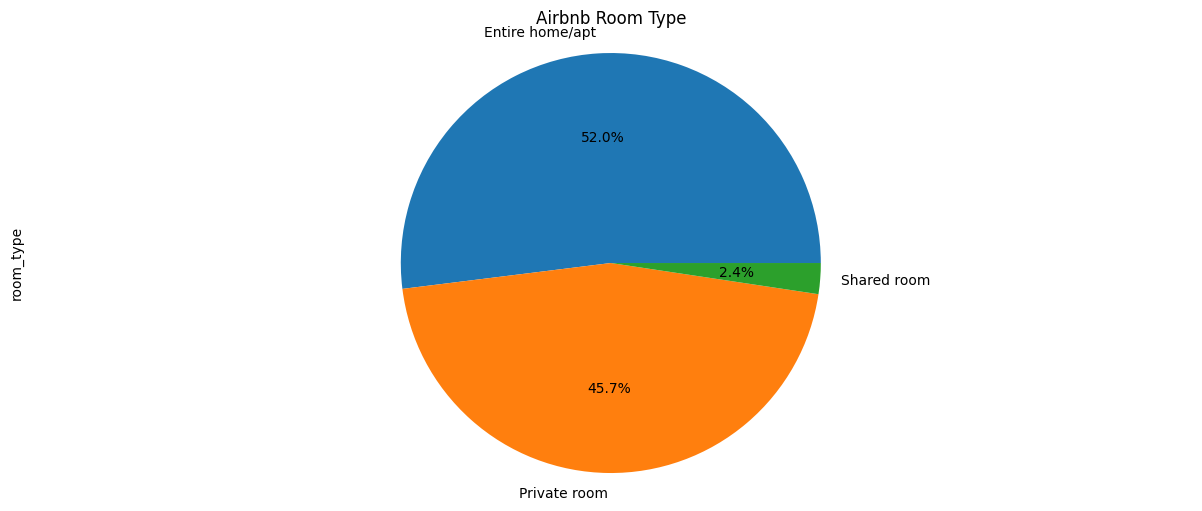

In [40]:
plt.figure(figsize=(8, 8))
data['room_type'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%")
plt.axis('equal')
plt.title('Airbnb Room Type')
plt.show()

##### 1. Why did I pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 48895 Airbind Hotels and therefore the Entire home/Apartment Holds 52.0% and Private Room holds 45.7% and Shared Room 2.4%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that Most of the Airbnb hotels are Entire Home/Apartments and Private Rooms. But the Shared Room Airbnb are very lowly booked by the customers. So the Shared room doesn't considered by the customers and it is very low by closing those shared room and changing it into Apartment and Private rooms you can make money and cut down the expenses that are spending in the Shared rooms.

#### **Chart - 4**

Text(0.5, 1.0, 'Total Number of Room type Distribution')

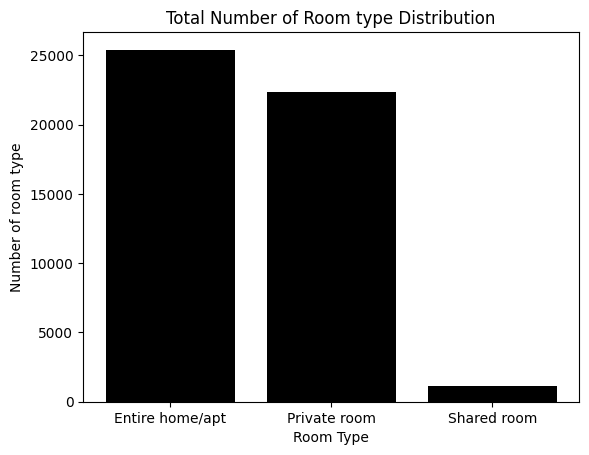

In [41]:
#total values distribution of room types

roomt=data['room_type'].value_counts()

plt.bar(roomt.index,roomt.values,color='black')
plt.xlabel('Room Type')
plt.ylabel('Number of room type')
plt.title('Total Number of Room type Distribution')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of airbnb room type, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are 3 types of room's in the Airbnb.

Those are Entire Home/Apartment , Private Room and Shared Room.

In these Room types most of the customers prefer Entire Home/Apartment which have 25,000+ booking and Private Room which is 22,000+ bookings and Shared room is lowly preferred by the customers which have 1160 bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that Most of the Airbnb hotels are Entire Home/Apartments and Private Rooms. But the Shared Room Airbnb are very lowly booked by the customers. So the Shared room doesn't considered by the customers and it is very low by closing those shared room and changing it into Apartment and Private rooms you can make money and cut down the expenses that are spending in the Shared rooms.

#### **Chart - 5**

Text(0.5, 1.0, 'Latitude and Longitude of the Location')

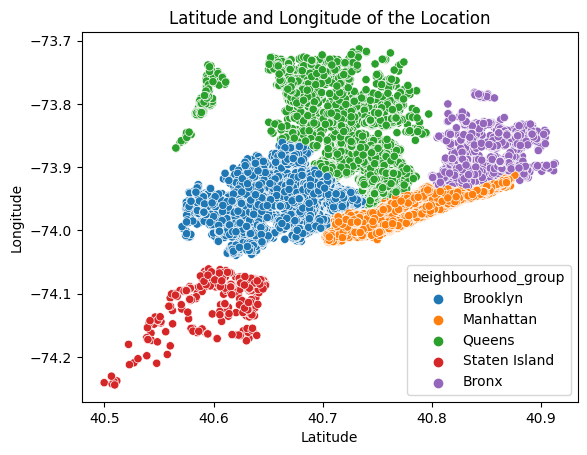

In [42]:
#Latitude and Longitude of the Location

sns.scatterplot(x=data['latitude'],y=data['longitude'],hue=data['neighbourhood_group'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Latitude and Longitude of the Location")

##### 1. Why did you pick the specific chart?

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between Latitude and Longtitude columns.

##### 2. What is/are the insight(s) found from the chart?

From the chart the Queens location have large land area comparing to the mostly booked location like manhattan and Brooklyn.

##### 3. Will the gained insights help creating a positive business impact?.

According to the land area the Queens have large in size, So we can open more number of Airbnb in the most popular area's and we can also close the airbnb which doesn't get any bookings in unpopular area in Queens.

#### **Chart - 6**

Text(0.5, 1.0, 'Latitude and Longitude of the Room Type')

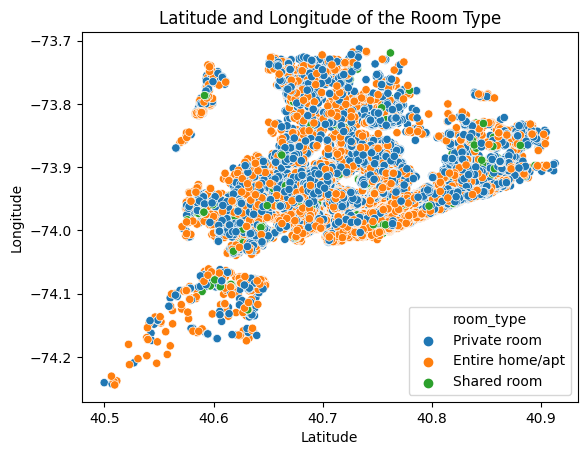

In [43]:
#Latitude and Longitude of the Room Type

sns.scatterplot(x=data['latitude'],y=data['longitude'],hue=data['room_type'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Latitude and Longitude of the Room Type")

#### **Chart - 7**

Text(0.5, 1.0, 'Average room prices of Location')

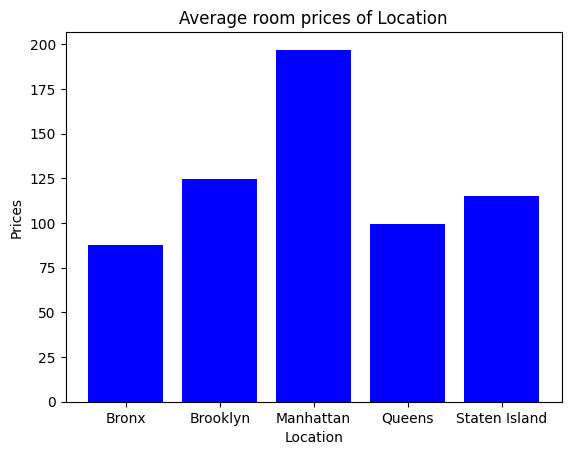

In [44]:
#average room prices of location

pri=data.groupby('neighbourhood_group')['price'].mean()

plt.bar(pri.index,pri.values,color='blue')
plt.xlabel('Location')
plt.ylabel('Prices')
plt.title('Average room prices of Location')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average room prices with respect to locations, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the manhattan have 190+ average of room price compared to others it high. And the Staten Island have a quite high in prices with low number of bookings, even though the Brooklyn have nearly same as manhattan in bookings but its price is very low compared to the manhattan room prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that the brooklyn room prices can be increased same as manhattan room prices and the staten island room prices can be decreased because may be due to the prices people may not stay in the room.

#### **Chart - 8**

Text(0.5, 1.0, 'Average room prices of Room type')

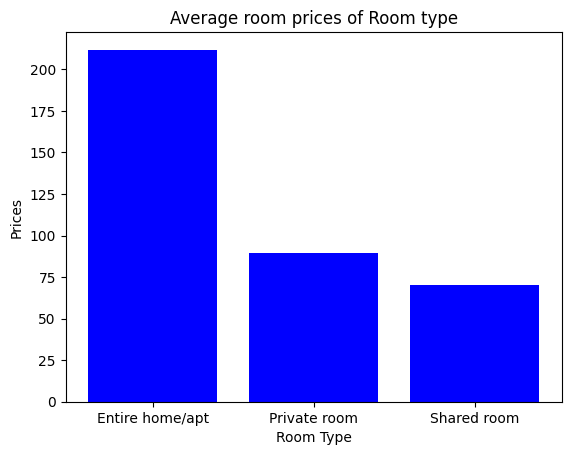

In [45]:
#Average room prices of room type

pri=data.groupby('room_type')['price'].mean()

plt.bar(pri.index,pri.values,color='blue')
plt.xlabel('Room Type')
plt.ylabel('Prices')
plt.title('Average room prices of Room type')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the Average room prices of room type, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the Entire/home have average room price of 200+ and their bookings is high and the private room have low in prices compared to their bookings its low in price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that we can increase the price of the private room not too high but it can be increased slighty high and after some time we can add some facilities into the room and increase the price because the bookings of the room is also high.

#### **Chart - 9**

Text(0.5, 1.0, 'Total Number of room Review of Room type')

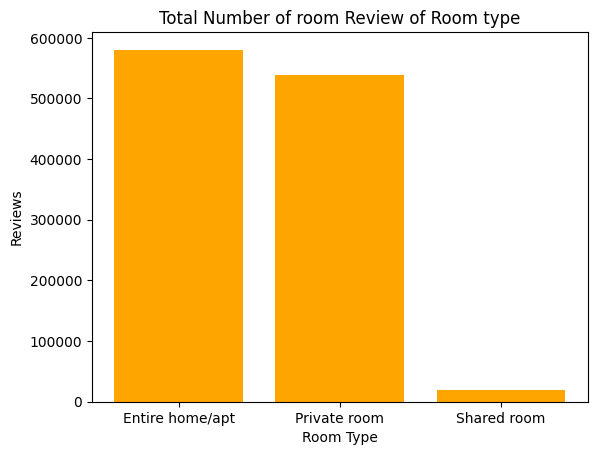

In [46]:
#Average reviews of room type

re=data.groupby('room_type')['number_of_reviews'].sum()

plt.bar(re.index,re.values,color='orange')
plt.xlabel('Room Type')
plt.ylabel('Reviews')
plt.title('Total Number of room Review of Room type')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of room review for room type, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the Enitre home have gotten nearly 6 lakh review and private room have 5.5 Lakh in review. the shared room number of review is too low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that the review for the entire home and private room was recoreded in good number but for the shared room its too low and even the booking is low if we recoreded the number of review we can know the customer's satisfaction in the room.

#### **Chart - 10**

Text(0.5, 1.0, 'Total Number of room Review of Location')

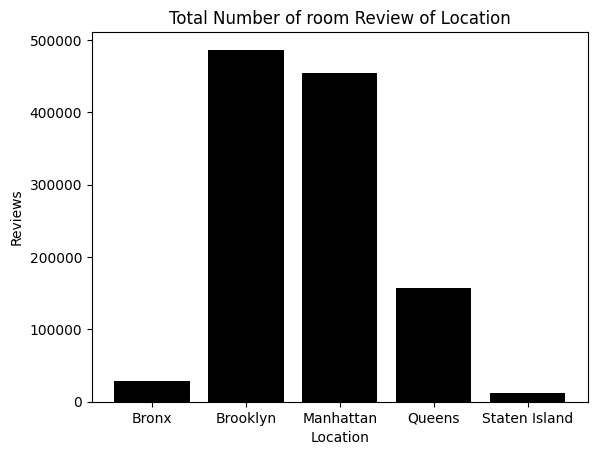

In [47]:
#Average reviews of Location

lo=data.groupby('neighbourhood_group')['number_of_reviews'].sum()

plt.bar(lo.index,lo.values,color='Black')
plt.xlabel('Location')
plt.ylabel('Reviews')
plt.title('Total Number of room Review of Location')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of reviews with respect to locations, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the manhattan and brooklyn have recoreded good number of reviews and the Bronx and staten Island have low recoreded reviews andeven quuen location have good number of bookings but its reviews recorded is low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that number of reviews recoreded in the manhattan and brooklyn is good but the queen's can focus more and the staten island have low in bookings and low in review recorded.

#### **Chart - 11**

Text(0.5, 1.0, 'Number of Nights for Room Type')

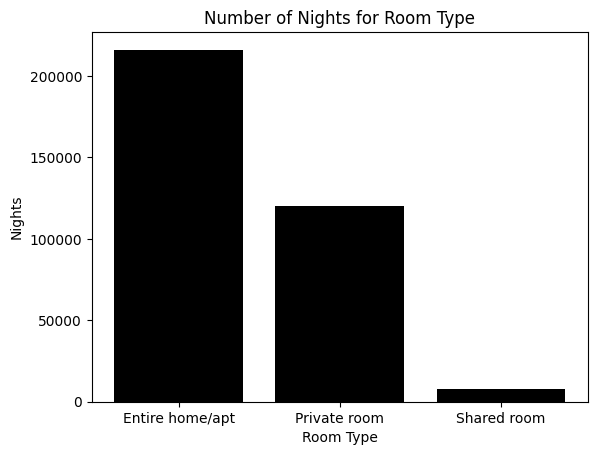

In [48]:
# Number of Nights for Room Type

no_re=data.groupby('room_type')['minimum_nights'].sum()

plt.bar(no_re.index,no_re.values,color='Black')
plt.xlabel('Room Type')
plt.ylabel('Nights')
plt.title('Number of Nights for Room Type')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of night for the room type, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the entire home have 2 lakh nights for that paid by customer's but the private room have partially equal booking as entire home but the night we provide is low compared to entire home.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that we can increase the number of stays for the private room and we can increase the price of the private room beacuse it have good number of bookings and reviews as well. So it can bring more income for the company. By doing this we need to provide the atleast same facility for private room that entire home have.

#### **Chart - 13**

Text(0.5, 1.0, 'Toatl number of Nights for Location')

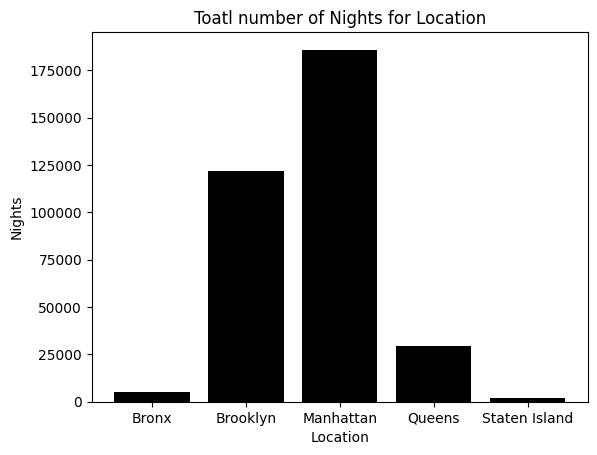

In [49]:
# Average number of Nights for Location

av_lo=data.groupby('neighbourhood_group')['minimum_nights'].sum()

plt.bar(av_lo.index,av_lo.values,color='Black')
plt.xlabel('Location')
plt.ylabel('Nights')
plt.title('Toatl number of Nights for Location')

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total number of nights with respect to locations, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the Manhattan location offered number of nights is 1.75+ lakh and for the brooklyn it is 1.15+ lakh, So the number of night stay can be increased in the brooklyn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that by increasing the number of nights in brooklyn the business will get developed beacuse the bookings is good and even by offering the facility same as manhattan.

#### **Chart - 14,15,16,17**

Text(0.5, 1.0, 'Total number of Not Reviews for Room Type')

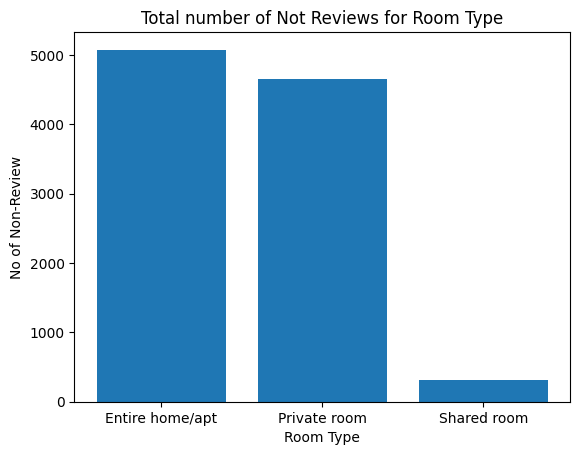

In [50]:
#Total number of Not Reviews for Room Type

ze=zero_re.groupby('room_type')['number_of_reviews'].count()
plt.bar(ze.index,ze.values)
plt.xlabel('Room Type')
plt.ylabel('No of Non-Review')
plt.title('Total number of Not Reviews for Room Type')

You can see the total number of non review room type above the Entire Home and Private room have more so the customer feedback is important and it should be focused.

Text(0.5, 1.0, 'Total number of Not Reviews for Locations')

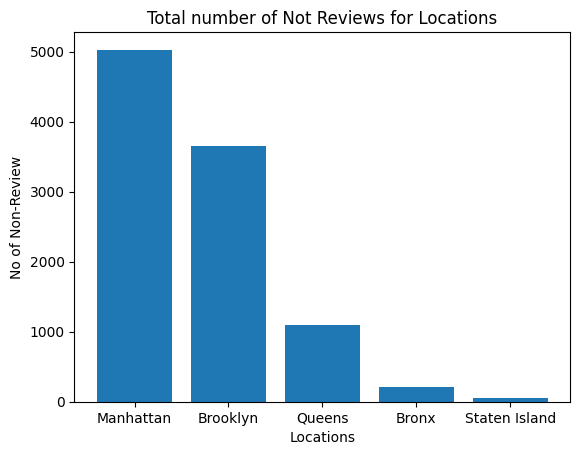

In [51]:
#Total number of Not Reviews for Locations

ze_lo=zero_re['neighbourhood_group'].value_counts()
plt.bar(ze_lo.index,ze_lo.values)
plt.xlabel('Locations')
plt.ylabel('No of Non-Review')
plt.title('Total number of Not Reviews for Locations')

In location manhattan with 5000+ and Brooklyn with 3800+ have the most non reviewed rooms.

Text(0.5, 1.0, 'Top 10 Total number of Not Reviews for Areas')

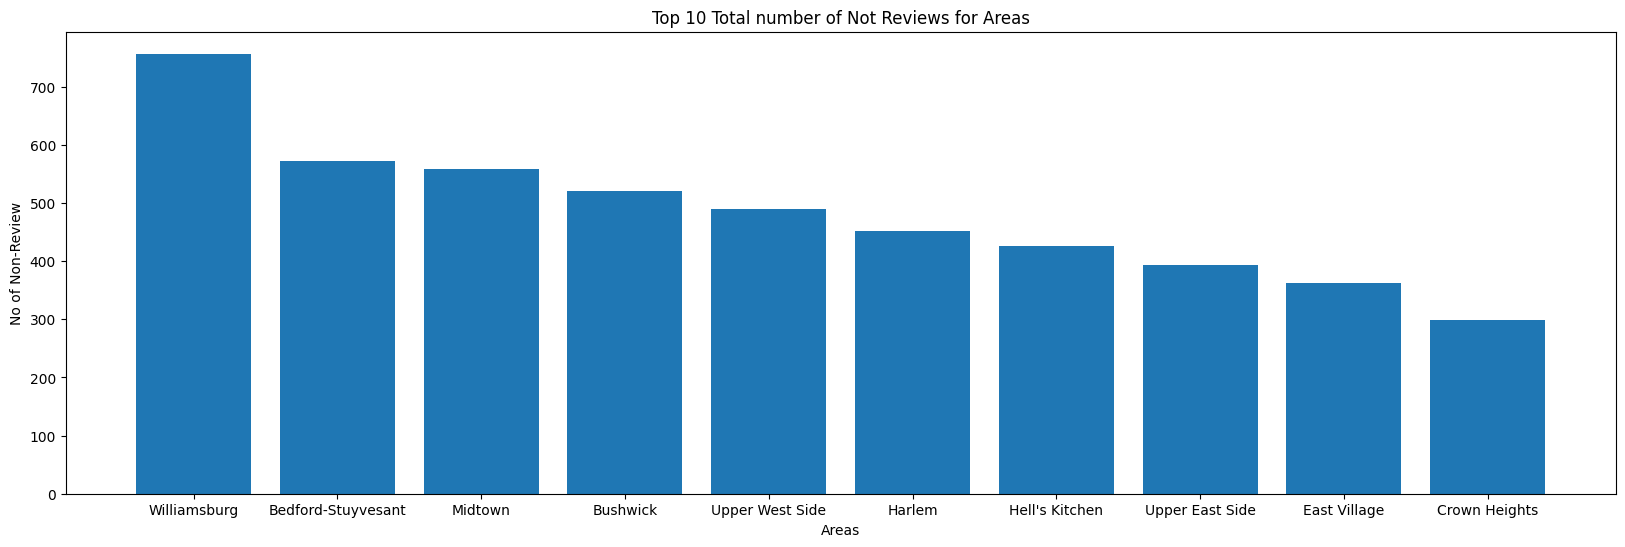

In [52]:
#Top 10 Total number of Not Reviews for Areas

new1=new.head(10)
plt.figure(figsize=(20,6))
plt.bar(new1.index,new1.values)
plt.xlabel('Areas')
plt.ylabel('No of Non-Review')
plt.title('Top 10 Total number of Not Reviews for Areas')

The Top 10 cities that have non reviews rooms and Williamsburg area have more with the numbers of 700+.

Text(0.5, 1.0, 'Top 10 names are been incharged')

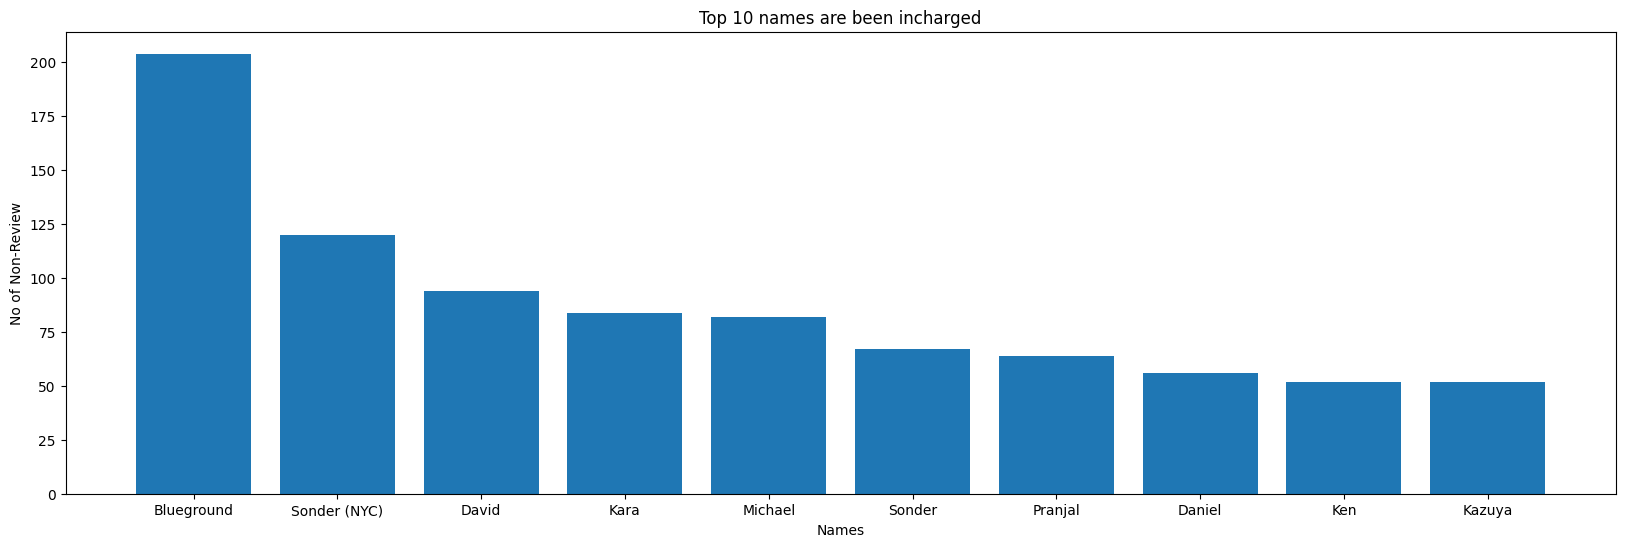

In [53]:
#Top 10 names are been incharged

name1=name.head(10)
plt.figure(figsize=(20,6))
plt.bar(name1.index,name1.values)
plt.xlabel('Names')
plt.ylabel('No of Non-Review')
plt.title('Top 10 names are been incharged')

Top 10 names are been incharged at that time in the non reviewed rooms , Blueground have most number which is 200+.

##### 1. Why did I pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the non reviews data for the Airbnb rooms, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that the most visited room have most non review recorded.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights I gained is that most of the room's are non reviewed so without the customer's feedback we can't able to know that the service or rooms are liked by the customer's are not, So need more concentrate in the feedback.

#### **Chart - 18**

Text(0.5, 1.0, 'Total number of checks per month')

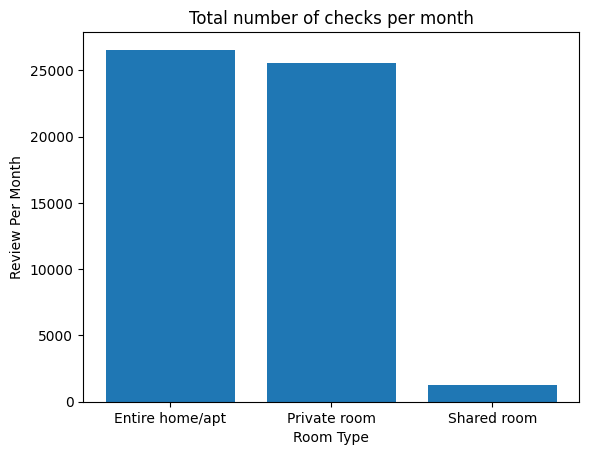

In [54]:
data['reviews_per_month'].fillna(0,inplace=True)# Total number of checks per month

to_ch=data.groupby('room_type')['reviews_per_month'].sum()
plt.bar(to_ch.index,to_ch.values)
plt.xlabel('Room Type')
plt.ylabel('Review Per Month')
plt.title('Total number of checks per month')

So the Toatal number of clicks in month for the room type as usual entire home and Private room have 25000 + checks.

#### **Chart - 19**

<ipython-input-55-dc4fc9fef7bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


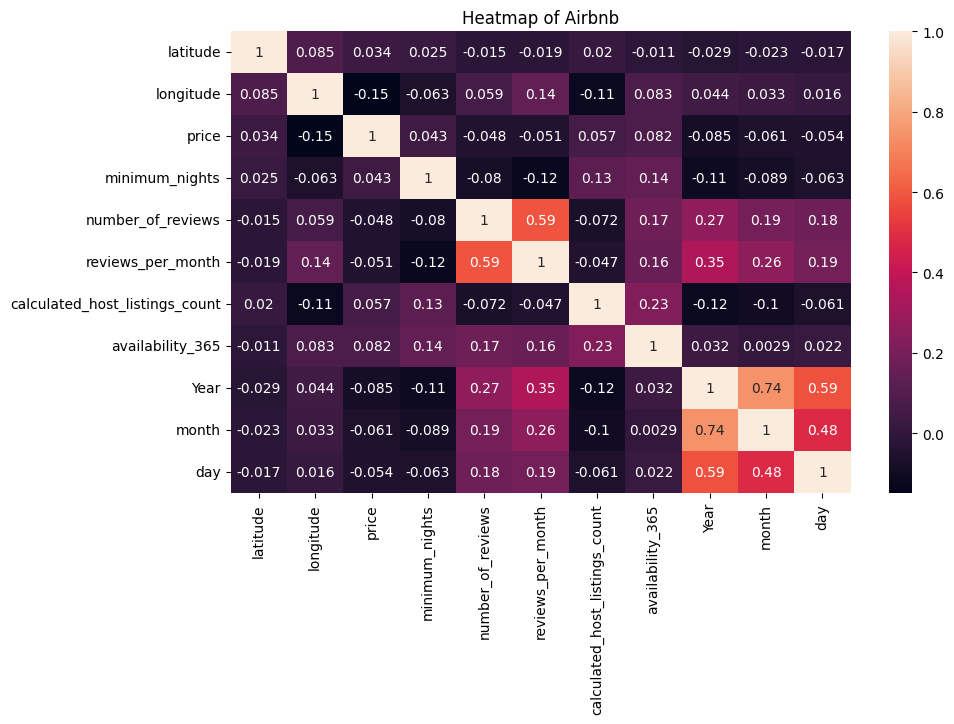

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap of Airbnb')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see none of the variable is highly positively correlated and highly negatively correlated.


Rest all correlation can be depicted from the above chart.


#### **Chart - 20**

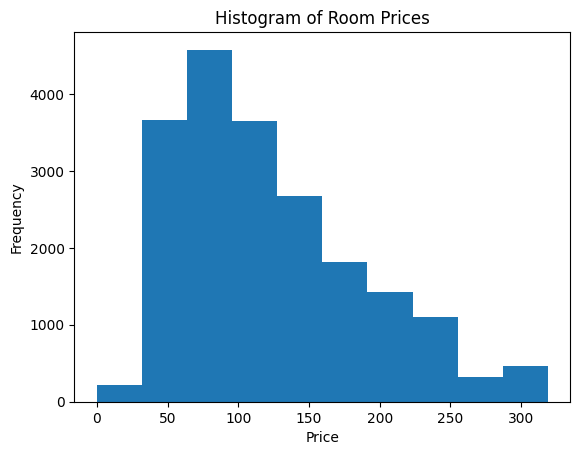

In [64]:
## Generate a histogram of the price variable

plt.hist(data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Room Prices')
plt.show()

**So in the price column most of the price fall under 50 to 150.**

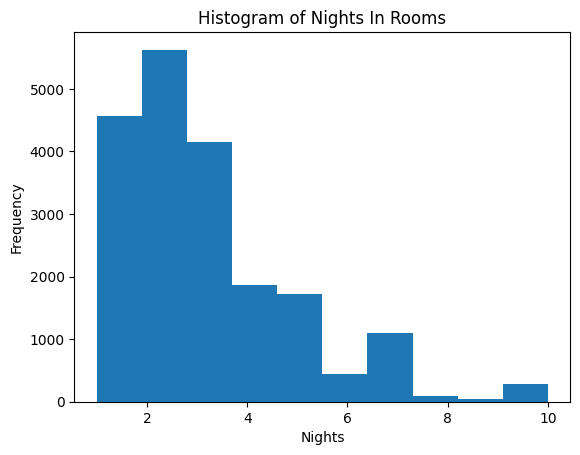

In [66]:
# Generate a histogram of the minimum_nights variable

plt.hist(data['minimum_nights'])
plt.xlabel('Nights')
plt.ylabel('Frequency')
plt.title('Histogram of Nights In Rooms')
plt.show()

**The Minimum nights paid to say is 2 to 4 nights for the room.**

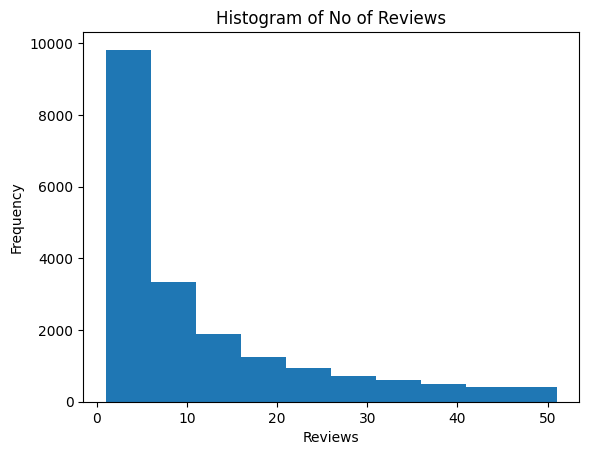

In [67]:
# Generate a histogram of the reviews variable

plt.hist(data['number_of_reviews'])
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of No of Reviews')
plt.show()

**The number of reviews have more no of null values due to non-recorded reviews so the most values is 0.**

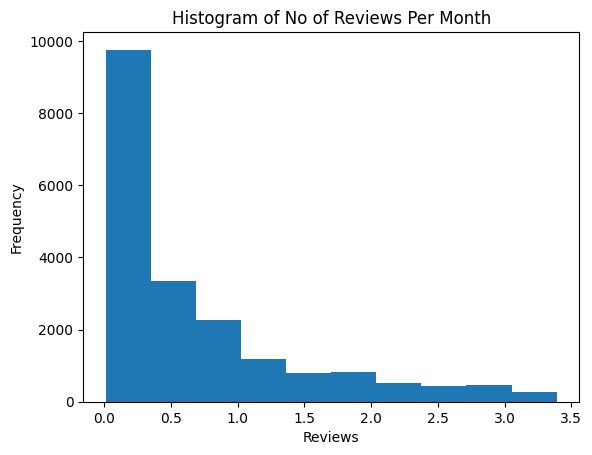

In [68]:
# Generate a histogram of the reviews per month variable

plt.hist(data['reviews_per_month'])
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of No of Reviews Per Month')
plt.show()

**The number of reviews have more no of null values due to non-recorded reviews so the most values is 0.**

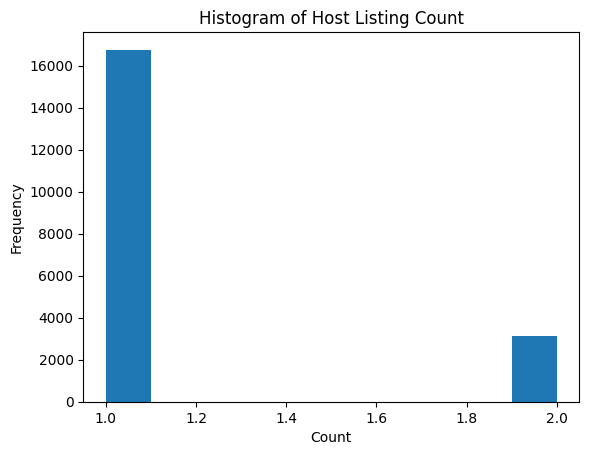

In [69]:
# Generate a histogram of the Hosting List variable

plt.hist(data['calculated_host_listings_count'])
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Host Listing Count')
plt.show()

**The most count of Host lisiting is 1 with the count of 16000 +.**

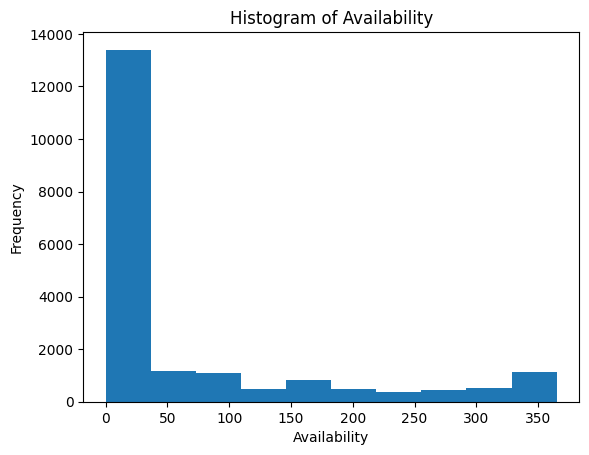

In [71]:
# Generate a histogram of the Availability variable

plt.hist(data['availability_365'])
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.title('Histogram of Availability')
plt.show()

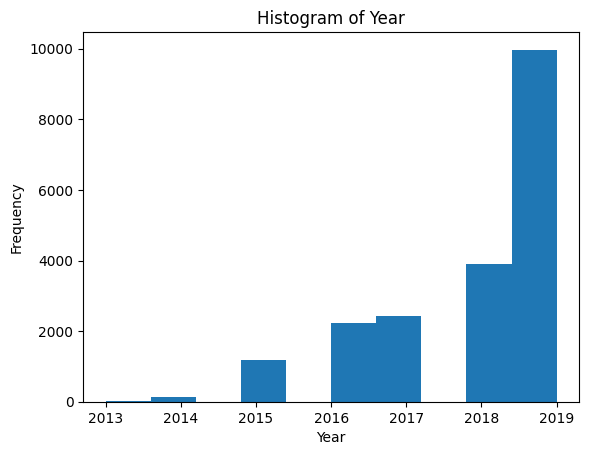

In [72]:
# Generate a histogram of the Year variable

plt.hist(data['Year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')
plt.show()

**As you can see the total number of booking in the year is keep on increasing and the business is growing continuosly.**

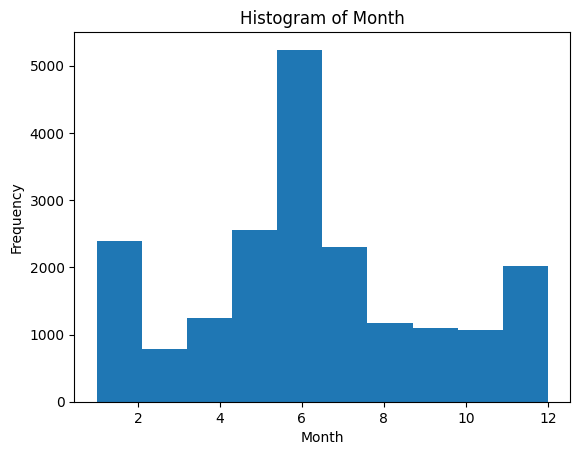

In [74]:
# Generate a histogram of the month variable

plt.hist(data['month'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.show()

At the month of May and June was the most of the bookings was booked.

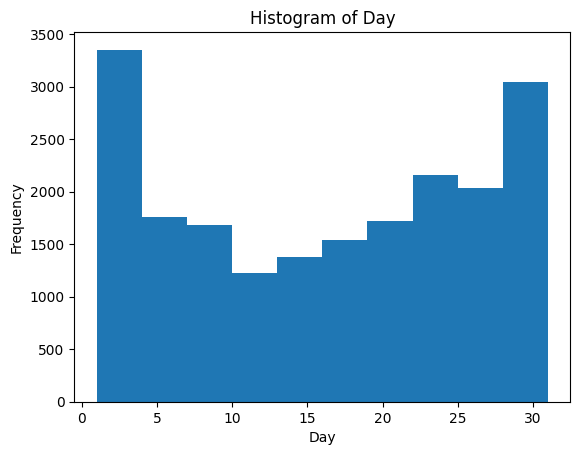

In [75]:
# Generate a histogram of the Day variable

plt.hist(data['day'])
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Histogram of Day')
plt.show()

**Most of the bookings was take part at the starting and End of the month.**

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

Many Columns are non-symmentrical filled with null values and outliers so after the visualization that I got insights of the which month,day is booked mostly by the customers. And the price range of the rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

# **Checking For Outliers**


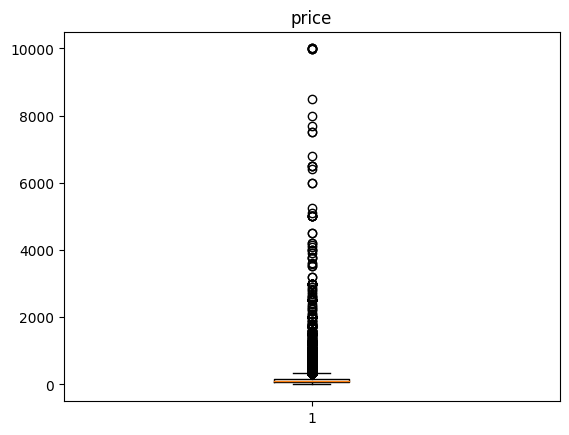

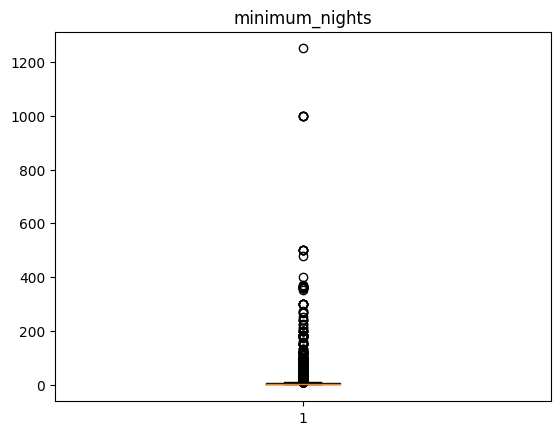

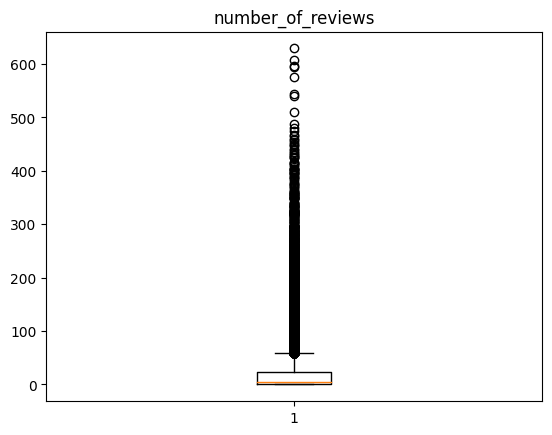

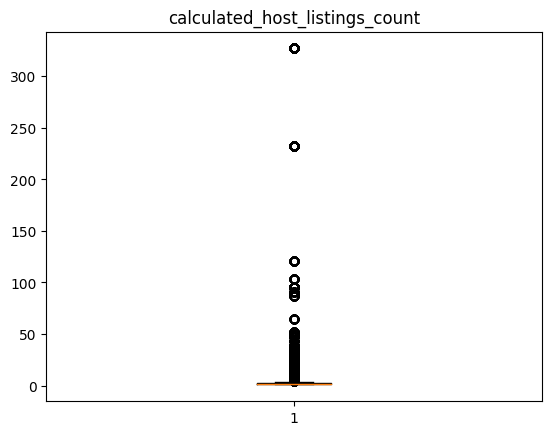

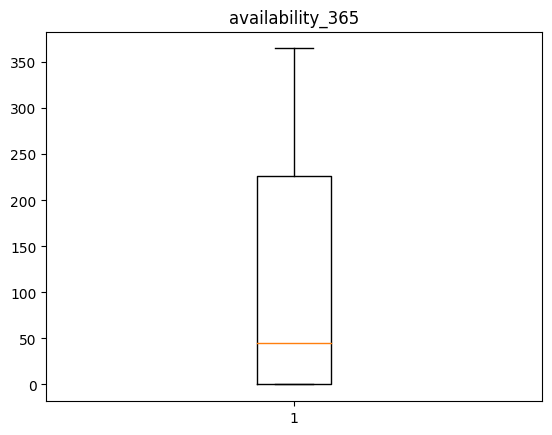

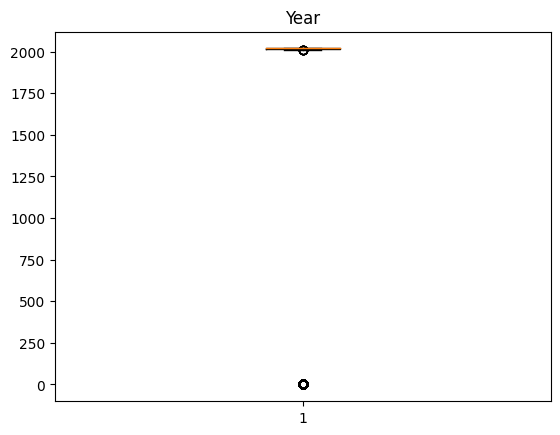

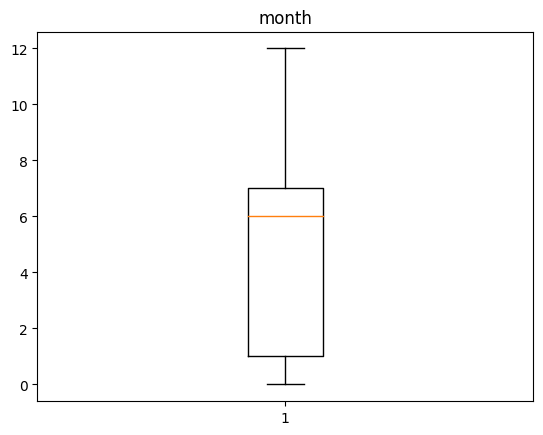

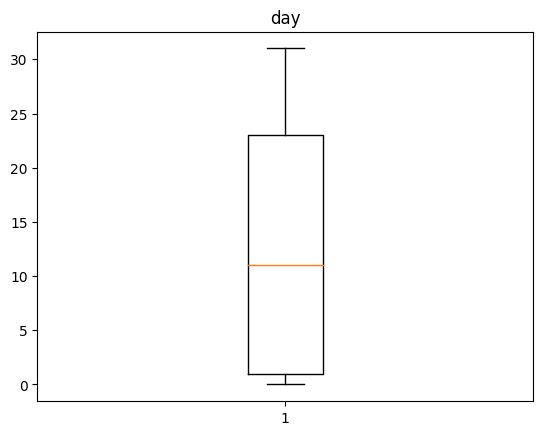

In [56]:
for i in data.columns:
  if data[i].dtype==int:
    plt.title(i)
    plt.boxplot(data[i])
    plt.show()

In [57]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

boston_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-57-92b32cd31d2d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-57-92b32cd31d2d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-57-92b32cd31d2d>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  boston_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


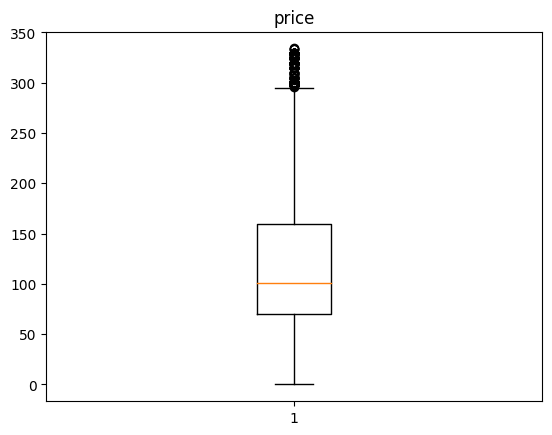

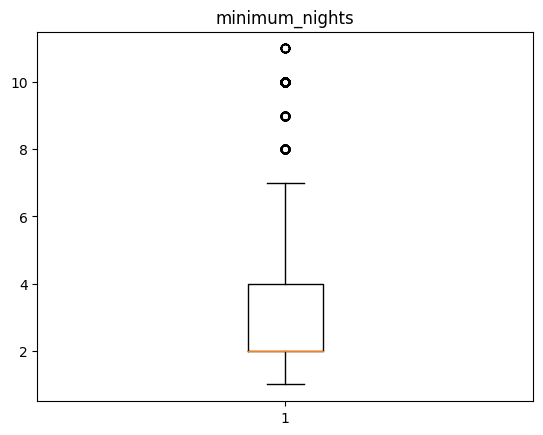

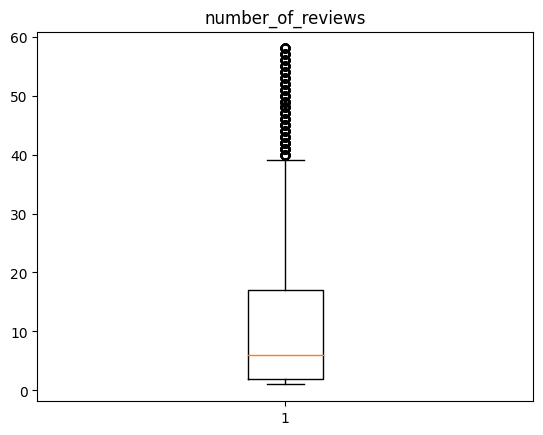

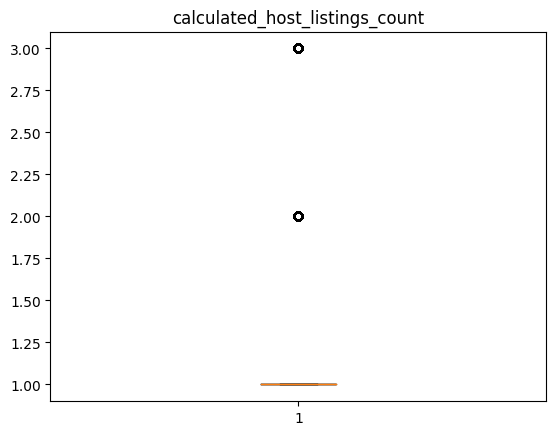

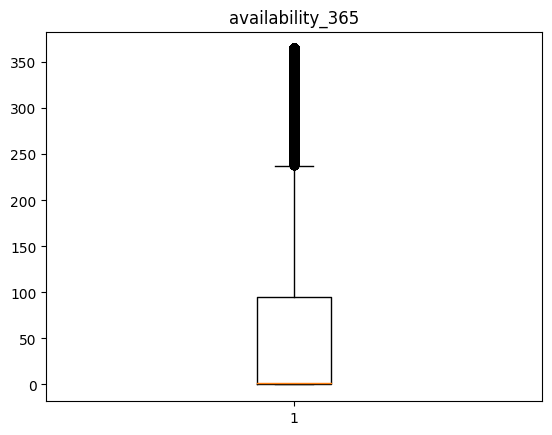

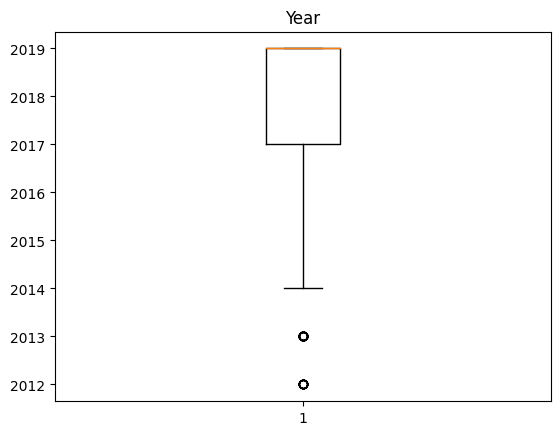

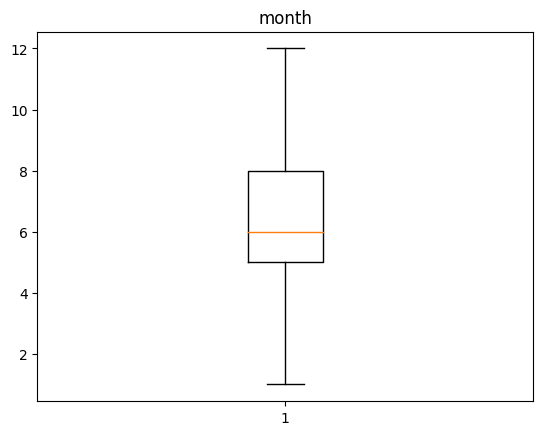

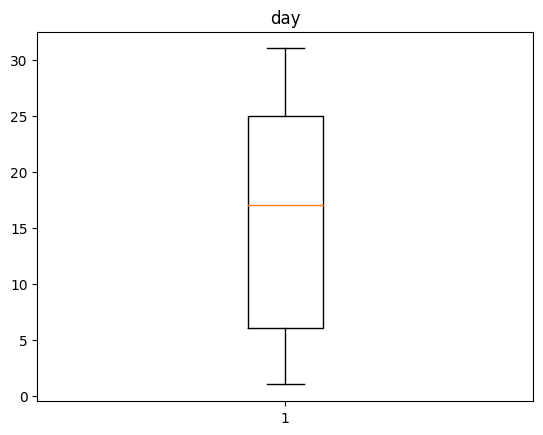

In [58]:
for i in boston_df_out.columns:
  if boston_df_out[i].dtype==int:
    plt.title(i)
    plt.boxplot(boston_df_out[i])
    plt.show()

In [59]:
boQ1 = boston_df_out.quantile(0.25)
boQ3 = boston_df_out.quantile(0.75)
boIQR = Q3 - Q1

data = boston_df_out[~((boston_df_out < (boQ1 - 1.5 * boIQR)) |(boston_df_out > (boQ3 + 1.5 * boIQR))).any(axis=1)]

<ipython-input-59-ab8f554aa2a0>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  boQ1 = boston_df_out.quantile(0.25)
<ipython-input-59-ab8f554aa2a0>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  boQ3 = boston_df_out.quantile(0.75)
<ipython-input-59-ab8f554aa2a0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = boston_df_out[~((boston_df_out < (boQ1 - 1.5 * boIQR)) |(boston_df_out > (boQ3 + 1.5 * boIQR))).any(axis=1)]


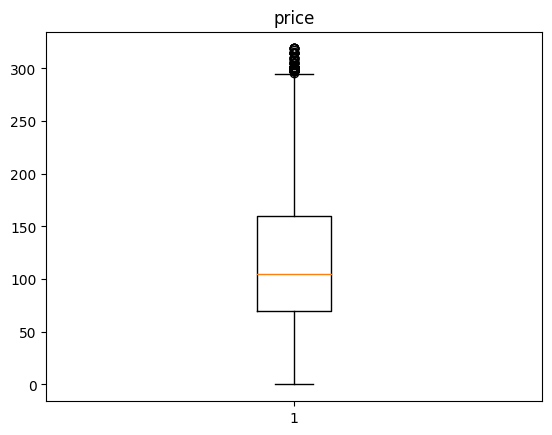

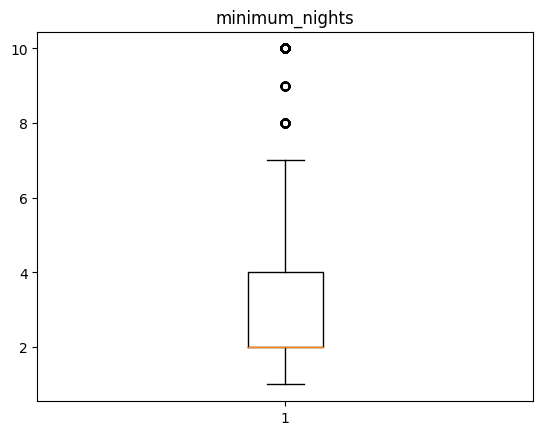

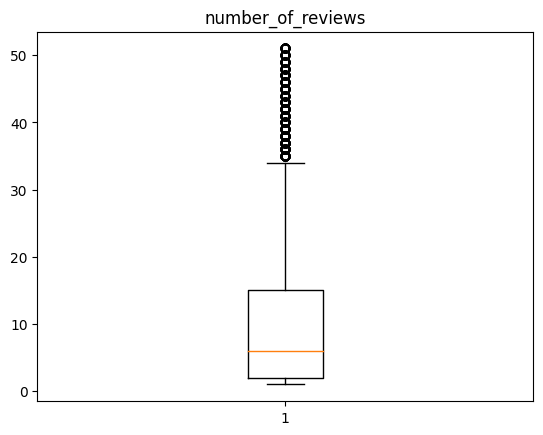

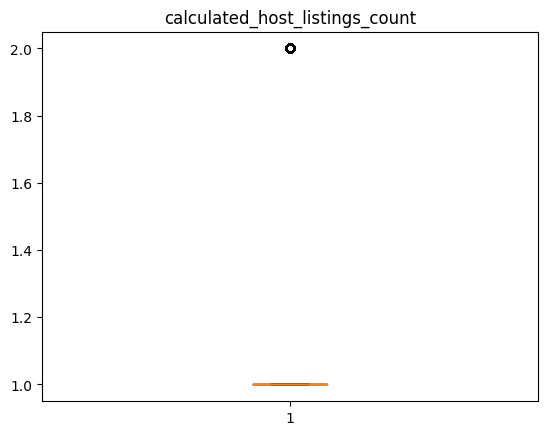

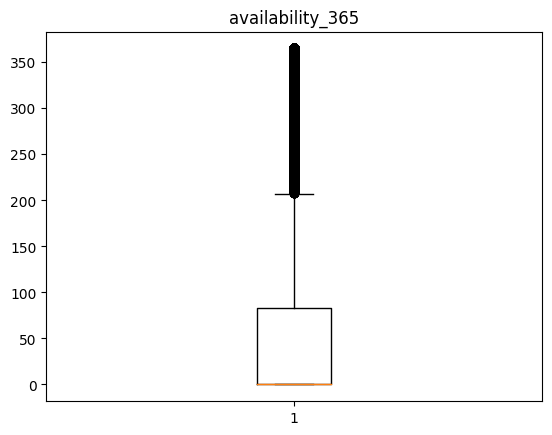

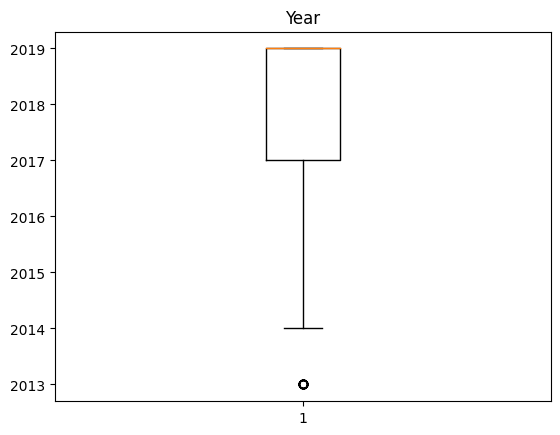

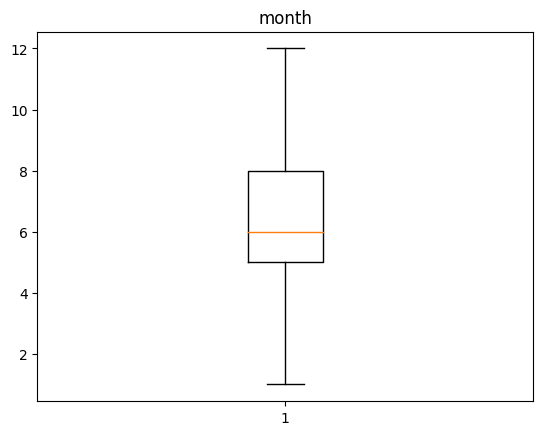

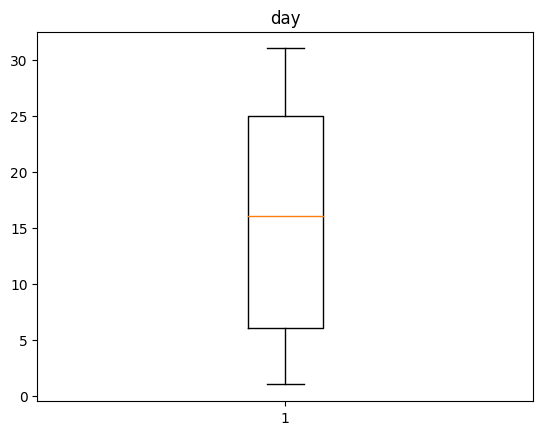

In [60]:
for i in data.columns:
  if data[i].dtype==int:
    plt.title(i)
    plt.boxplot(data[i])
    plt.show()

In [61]:
data.shape

(19888, 16)

**As you can see number of outliers have been reduced comparing to the actual dataset**

# **Conclusion**

<h1>Need to be Improved</h1>

**1. So the number of rooms those are not reviewed is 5643.**

**2. The average room price of room not reviewed is 124.**

**3. Shared Room is booked low by the customers.**

**4. Bronx and Staten Island location have low booking compared to others and Even though these two location have good average review by customers.**

**5. According to latitude and longtitude data Queen's location have more number of hotels in location but it is booked very low by customers.**

**6. Customer's Feedback is very important and Those things should be focused more.**


<h1>Performed Good Compared to Others</h1>

**1.These hotels have booked frequently by customers - Home away from home,Hillside Hotel,New york Multi-unit building.**

**2. Manhattan Location have highest bookings**

**3. Williamsburg Area have high number of locations**

**4. home/apt Room type have high number of stays**

